## Diab_pyth_data.csv dataset exploration, analysis and model comparision

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
df_demo = pd.read_csv('useful/Diab_pyth_data.csv')

In [4]:
df_demo

,Age,Gender,Blood_Pressure,Family_member_with_Diabetes_past_present,BMI,percentage_diabetes
0,40,Male,1,0,28,62.00
1,38,Female,1,1,20,70.00
2,39,Female,0,0,21,60.25
3,32,Female,0,1,25,51.25
4,24,Female,1,1,26,31.50
...,...,...,...,...,...,...
6580,27,Male,0,1,31,37.75
6581,31,Male,0,1,28,37.00
6582,38,Male,0,0,29,57.25
6583,28,Male,1,1,22,45.50


In [7]:
df_demo.dtypes

Age                                           int64
Gender                                       object
Blood_Pressure                                int64
Family_member_with_Diabetes_past_present      int64
BMI                                           int64
percentage_diabetes                         float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6585 entries, 0 to 6584
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       6585 non-null   int64  
 1   Gender                                    6585 non-null   object 
 2   Blood_Pressure                            6585 non-null   int64  
 3   Family_member_with_Diabetes_past_present  6585 non-null   int64  
 4   BMI                                       6585 non-null   int64  
 5   percentage_diabetes                       6585 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 308.8+ KB


In [9]:
df_demo.describe(include='all')

,Age,Gender,Blood_Pressure,Family_member_with_Diabetes_past_present,BMI,percentage_diabetes
count,6585.000000,6585,6585.000000,6585.000000,6585.000000,6585.000000
unique,NaN,3,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,NaN
freq,NaN,3291,NaN,NaN,NaN,NaN
mean,29.144875,NaN,0.496128,0.497646,27.034624,46.042635
std,6.684272,NaN,0.500023,0.500032,7.727121,16.210711
min,18.000000,NaN,0.000000,0.000000,14.000000,3.500000
25%,23.000000,NaN,0.000000,0.000000,20.000000,34.750000
50%,29.000000,NaN,0.000000,0.000000,27.000000,45.750000
75%,35.000000,NaN,1.000000,1.000000,34.000000,58.500000


<AxesSubplot:>

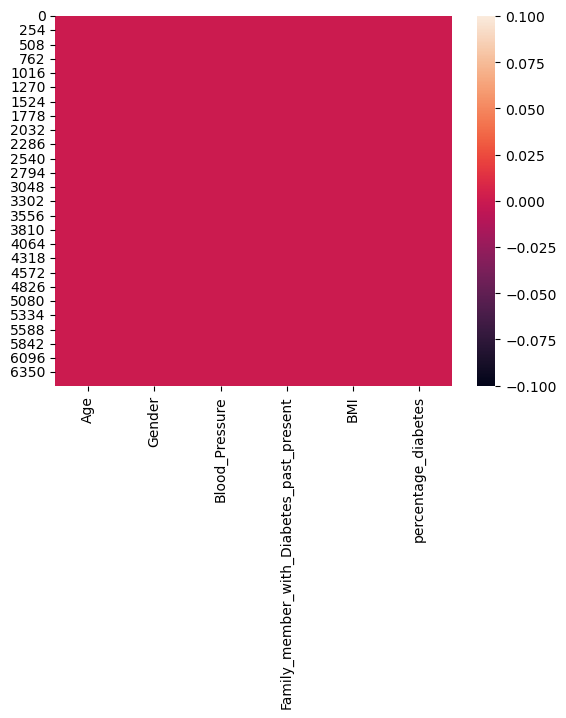

In [10]:
sns.heatmap(df_demo.isnull())

In [14]:
df_demo.isnull().sum(axis=0)

Age                                         0
Gender                                      0
Blood_Pressure                              0
Family_member_with_Diabetes_past_present    0
BMI                                         0
percentage_diabetes                         0
dtype: int64

In [17]:
# converting categorical variable into numerical
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_demo['Gender'] =  label_encoder.fit_transform(df_demo['Gender'])
    
df_demo.head()

,Age,Gender,Blood_Pressure,Family_member_with_Diabetes_past_present,BMI,percentage_diabetes
0,40,1,1,0,28,62.00
1,38,0,1,1,20,70.00
2,39,0,0,0,21,60.25
3,32,0,0,1,25,51.25
4,24,0,1,1,26,31.50


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


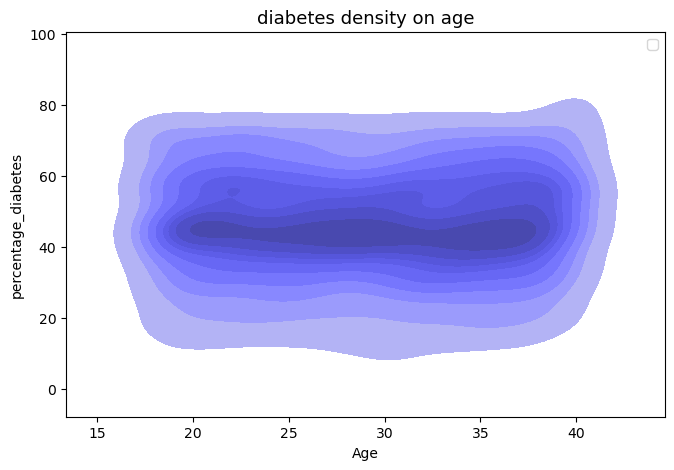

In [26]:
import matplotlib.pyplot as plt
# Age Vs %diabetes KDE Plot------------------ 
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title('diabetes density on age',fontsize = 13)
sns.kdeplot(x =df_demo['Age'], y = df_demo['percentage_diabetes'],color='blue',shade=True)
plt.legend()
plt.show()

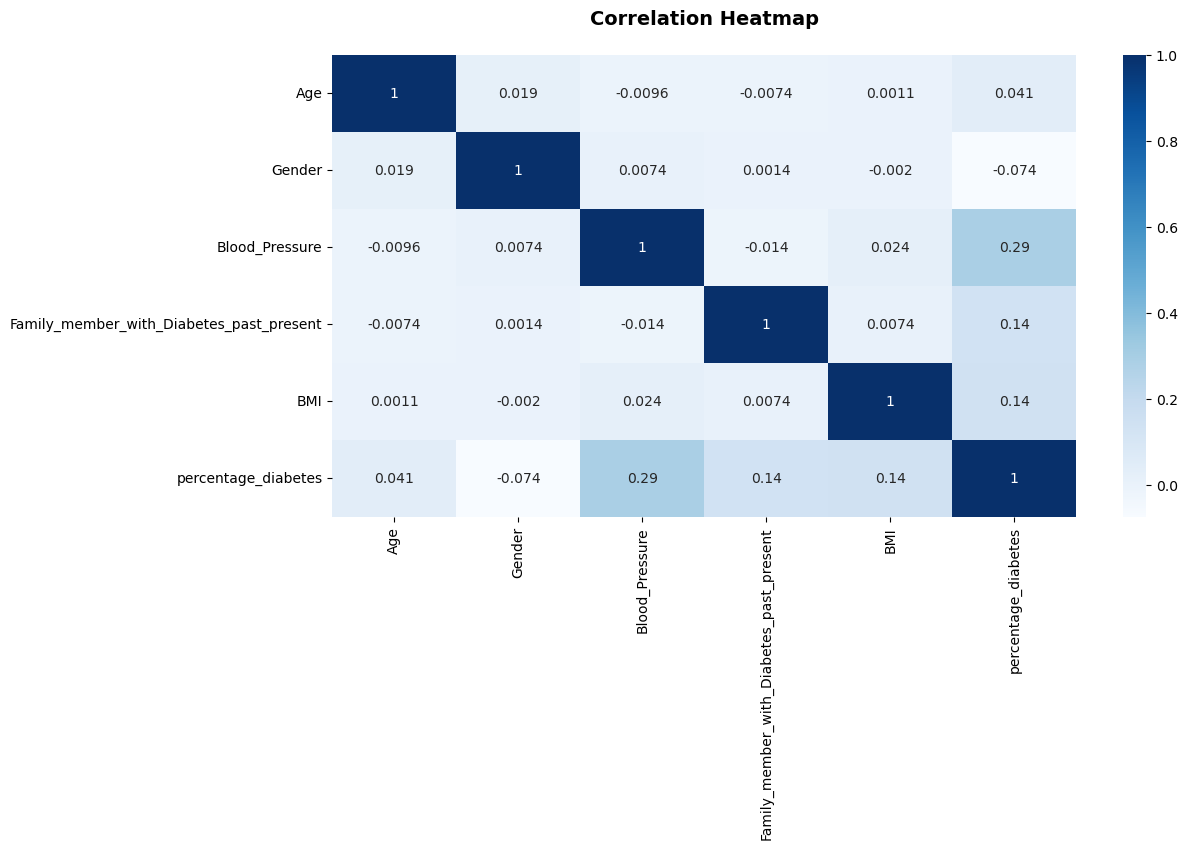

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df_demo.corr(),cmap="Blues", annot=True)
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

In [33]:
X1 = df_demo.iloc[:,0:-1]
y1 = df_demo.iloc[:,-1]

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
best_feature = SelectKBest(mutual_info_regression,k=2)
fit = best_feature.fit(X1,y1)

In [37]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)

In [38]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

In [39]:
featurescores.sort_values('scores', ascending=False)

,column,scores
4,BMI,1.120914
2,Blood_Pressure,0.103675
3,Family_member_with_Diabetes_past_present,0.067045
0,Age,0.011415
1,Gender,0.005944


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trans_df = pd.DataFrame(scaler.fit_transform(df_demo), columns = df_demo.columns)
trans_df.head()

,Age,Gender,Blood_Pressure,Family_member_with_Diabetes_past_present,BMI,percentage_diabetes
0,1.624103,0.991411,1.007775,-0.995303,0.124943,0.984446
1,1.324871,-0.997754,1.007775,1.004719,-0.910450,1.477985
2,1.474487,-0.997754,-0.992285,-0.995303,-0.781026,0.876485
3,0.427173,-0.997754,-0.992285,1.004719,-0.263329,0.321254
4,-0.769757,-0.997754,1.007775,1.004719,-0.133905,-0.897168


<AxesSubplot:>

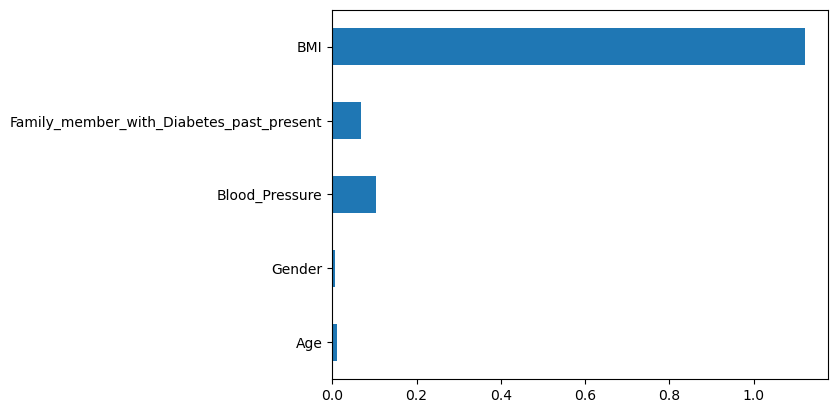

In [41]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

In [51]:
x_var = df_demo[['Age','Gender','Family_member_with_Diabetes_past_present','BMI']]
y_var = df_demo.iloc[:,-1]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_var,y_var,test_size = 0.3,random_state=42)

In [61]:
X_train

,Age,Gender,Family_member_with_Diabetes_past_present,BMI
3535,38,0,0,20
3460,32,1,1,35
5417,32,1,1,21
4784,20,0,0,15
4395,40,1,1,40
...,...,...,...,...
4931,23,1,0,34
3264,21,0,1,22
1653,24,1,0,16
2607,36,0,0,21


In [62]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [63]:
X_train

array([[ 1.31122428, -0.995466  , -0.99114358, -0.90926563],
       [ 0.41047418,  0.99762817,  1.00893556,  1.03140118],
       [ 0.41047418,  0.99762817,  1.00893556, -0.77988784],
       ...,
       [-0.79052597,  0.99762817, -0.99114358, -1.42677677],
       [ 1.01097425, -0.995466  , -0.99114358, -0.77988784],
       [-0.34015091,  0.99762817,  1.00893556, -1.1680212 ]])

In [64]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "Support Vector Machine (RBF Kernel)": SVR(),
    "Neural Network": MLPRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Linear Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [68]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    print(name, "average negative MSE: {:.2f}".format(scores.mean()))

Linear Regression average negative MSE: -251.21
K-Nearest Neighbors average negative MSE: -297.54
Decision Tree average negative MSE: -415.61
Support Vector Machine (Linear Kernel) average negative MSE: -252.80
Support Vector Machine (RBF Kernel) average negative MSE: -252.36
Neural Network average negative MSE: -250.15
Random Forest average negative MSE: -323.72
Gradient Boosting average negative MSE: -248.19


In [69]:
best_model = None
best_score = float('inf')

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_score = scores.mean()
    print(name, "average negative MSE: {:.2f}".format(avg_score))
    if avg_score < best_score:
        best_model = model
        best_score = avg_score

print("\nBest model:", best_model)

Linear Regression average negative MSE: -251.21
K-Nearest Neighbors average negative MSE: -297.54
Decision Tree average negative MSE: -416.39
Support Vector Machine (Linear Kernel) average negative MSE: -252.80
Support Vector Machine (RBF Kernel) average negative MSE: -252.36
Neural Network average negative MSE: -250.05
Random Forest average negative MSE: -324.11
Gradient Boosting average negative MSE: -248.18

Best model: DecisionTreeRegressor()


In [72]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor(criterion='mse')
dc.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse')

In [75]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score

# dc = DecisionTreeRegressor(criterion='mse')
scores = cross_val_score(dc, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("MSE: {:.2f}".format(scores.mean()))


MSE: -396.97


In [77]:
from sklearn.metrics import mean_absolute_error
y_pred = dc.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error: {:.2f}".format(mae))

Mean Absolute Error: 16.12


In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
# Calculate the mean squared error on the test data
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean squared error: {:.3f}'.format(mse))

# Evaluate the model using 5-fold cross-validation
cv_scores = cross_val_score(dc, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print('Cross-validation scores: {}'.format(cv_scores))
print('Average cross-validation score: {:.3f}'.format(-cv_scores.mean()))


Mean squared error: 400.631
Cross-validation scores: [-430.71437395 -424.12933086 -399.30077278 -403.14022204 -425.86278502]
Average cross-validation score: 416.629


In [86]:
user_inp = np.array([40,1,0,28])
user_inp = user_inp.reshape(1, -1)

# apply the scaler on the input array
user_inp_scaled = ss.transform(user_inp)

print(user_inp_scaled)

[[ 1.61147432  0.99762817 -0.99114358  0.12575667]]


In [87]:
dc.predict(user_inp_scaled)

array([53.66666667])